In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import numpy as np

MEAN_RENT_PATH = os.path.join("..", "datasets")
STUDENT_COUNT_PATH = os.path.join("..", "datasets")


def load_rent_data(mean_rent_path=MEAN_RENT_PATH, student_count_path=STUDENT_COUNT_PATH):
    rent_csv = os.path.join(mean_rent_path, "region-mean-rents.csv")
    students_csv = os.path.join(student_count_path, "enrolments.csv")
    return pd.read_csv(rent_csv), pd.read_csv(students_csv)
rent_data, students_data = load_rent_data()
%matplotlib inline

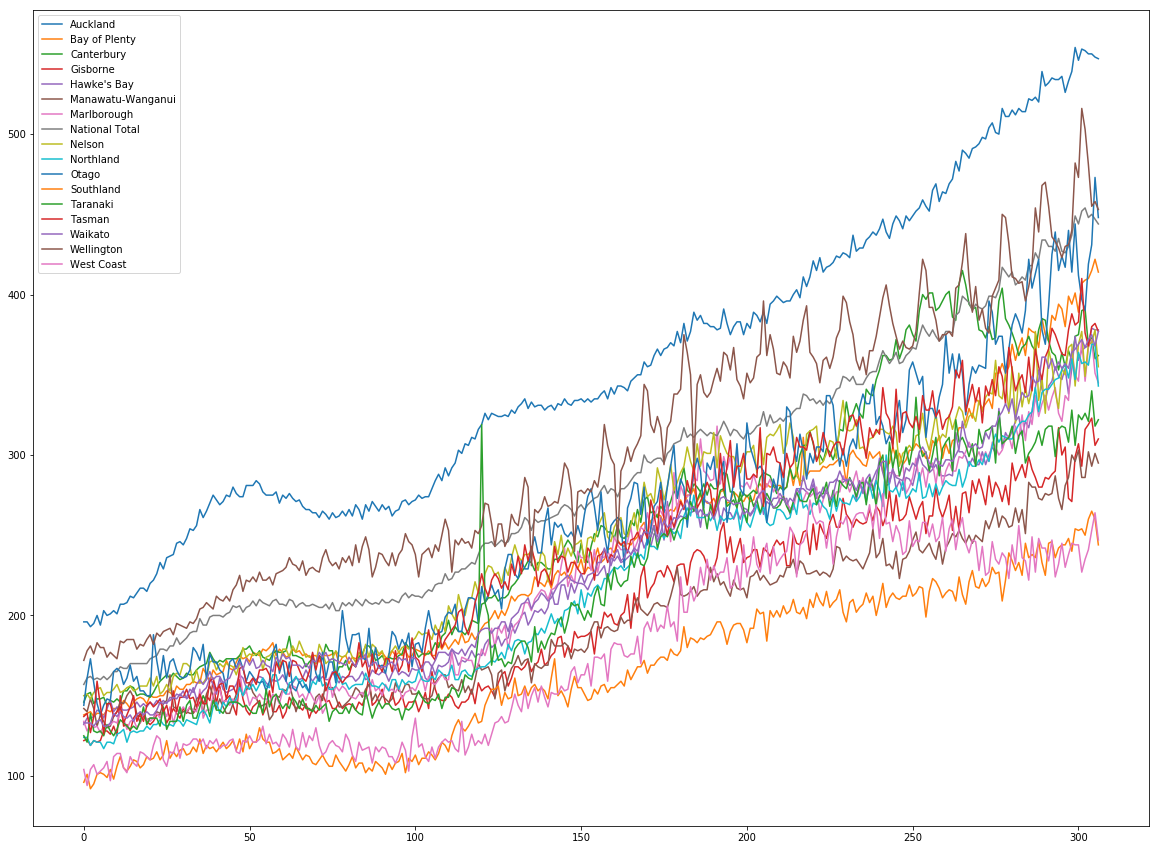

In [119]:
rent_data.plot(figsize=(20,15))
